<a href="https://colab.research.google.com/github/polock11/Data-Visualization-with-Python/blob/main/supervised_learning_decision_tree_CV_grid_search.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Topics:

* Decission Tree
* plot decision tree

In [1]:
import numpy as np
import pandas as pd


from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import GridSearchCV, train_test_split

from sklearn.metrics import r2_score, roc_curve, roc_auc_score, precision_score, recall_score, f1_score
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, plot_confusion_matrix

import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [2]:
df = pd.read_csv('processed.cleveland.data', header = None, na_values='?')

#dropping all the nan/missing values
df = df.dropna()

df.columns = ['age', 'sex','cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'olepeak','slope','ca','thal', 'hd']

df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,olepeak,slope,ca,thal,hd
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 297 entries, 0 to 301
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       297 non-null    float64
 1   sex       297 non-null    float64
 2   cp        297 non-null    float64
 3   trestbps  297 non-null    float64
 4   chol      297 non-null    float64
 5   fbs       297 non-null    float64
 6   restecg   297 non-null    float64
 7   thalach   297 non-null    float64
 8   exang     297 non-null    float64
 9   olepeak   297 non-null    float64
 10  slope     297 non-null    float64
 11  ca        297 non-null    float64
 12  thal      297 non-null    float64
 13  hd        297 non-null    int64  
dtypes: float64(13), int64(1)
memory usage: 34.8 KB


In [4]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
olepeak     0
slope       0
ca          0
thal        0
hd          0
dtype: int64

In [5]:
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
olepeak     0
slope       0
ca          0
thal        0
hd          0
dtype: int64

In [6]:
df['hd'].value_counts()

0    160
1     54
2     35
3     35
4     13
Name: hd, dtype: int64

In [7]:
#converting from multiclass to binary class
df[df['hd']> 1] = 1

In [8]:
df['hd'].value_counts()

0    160
1    137
Name: hd, dtype: int64

In [9]:
X = df.drop('hd', axis = 1)
y = df[['hd']]

#One_hot Encoding

In [10]:
X = pd.get_dummies(X, columns = ['restecg', 'slope', 'cp', 'ca', 'thal'], drop_first = True)

In [11]:
X.columns

Index(['age', 'sex', 'trestbps', 'chol', 'fbs', 'thalach', 'exang', 'olepeak',
       'restecg_1.0', 'restecg_2.0', 'slope_2.0', 'slope_3.0', 'cp_2.0',
       'cp_3.0', 'cp_4.0', 'ca_1.0', 'ca_2.0', 'ca_3.0', 'thal_3.0',
       'thal_6.0', 'thal_7.0'],
      dtype='object')

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = .2, random_state = 42, stratify = y)

In [13]:
print(X.shape, y.shape)
print(X.columns)

(297, 21) (297, 1)
Index(['age', 'sex', 'trestbps', 'chol', 'fbs', 'thalach', 'exang', 'olepeak',
       'restecg_1.0', 'restecg_2.0', 'slope_2.0', 'slope_3.0', 'cp_2.0',
       'cp_3.0', 'cp_4.0', 'ca_1.0', 'ca_2.0', 'ca_3.0', 'thal_3.0',
       'thal_6.0', 'thal_7.0'],
      dtype='object')


In [14]:
model_dt = DecisionTreeClassifier()
model_dt = model_dt.fit(X_train, y_train)

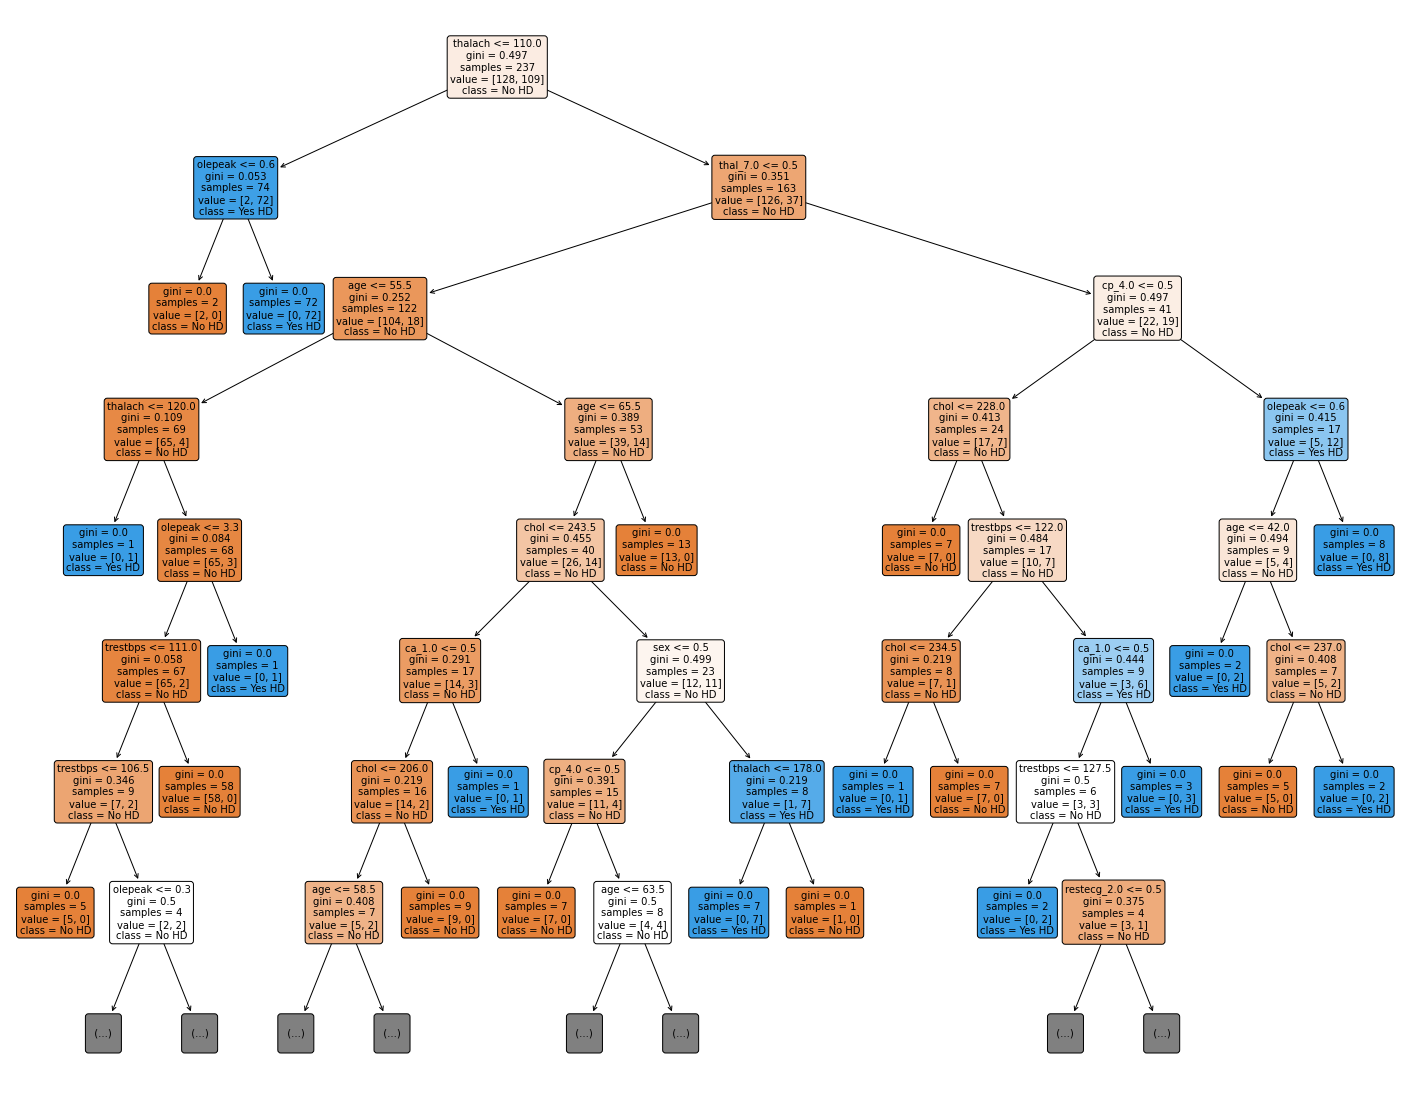

In [15]:
#Plot tree
from matplotlib import pyplot as plt

plt.figure(figsize = (25,20))

plot_tree(model_dt, 
          max_depth = 7, 
          feature_names = X.columns, 
          filled = True, 
          rounded = True, 
          class_names =['No HD', 'Yes HD'],
          fontsize = 10)

plt.show()

In [16]:
y_pred = model_dt.predict(X_test)

In [17]:
accuracy_ = accuracy_score(y_test, y_pred)
print('accuracy: ', accuracy_)

precision_ = precision_score(y_test, y_pred)
print('precision: ', precision_)

recall_ = recall_score(y_test, y_pred)
print('recall: ', recall_)

f1_ = f1_score(y_test, y_pred)
print('f1: ', f1_)

accuracy:  0.8166666666666667
precision:  0.7741935483870968
recall:  0.8571428571428571
f1:  0.8135593220338982


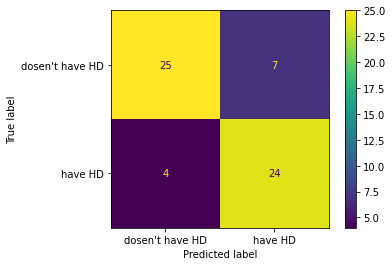

In [18]:
plot_confusion_matrix(model_dt,
                      X_test,y_test,
                      display_labels = ['dosen\'t have HD', 'have HD'])
plt.show()

In [19]:
classification_report_ = classification_report(y_test, y_pred)
print(classification_report_)

              precision    recall  f1-score   support

           0       0.86      0.78      0.82        32
           1       0.77      0.86      0.81        28

    accuracy                           0.82        60
   macro avg       0.82      0.82      0.82        60
weighted avg       0.82      0.82      0.82        60



#Roc Curve

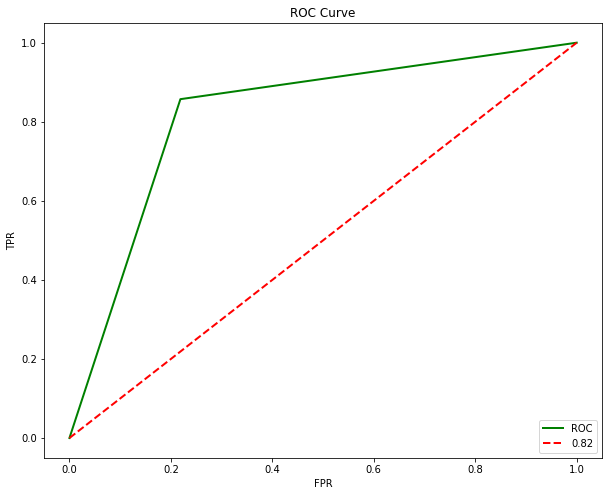

In [20]:
fpr, tpr, thr = roc_curve(y_test, model_dt.predict_proba(X_test)[:,1])

auc = np.round(roc_auc_score(y_test, y_pred),2)

plt.figure(figsize = (10,8))
plt.plot(fpr, tpr, color = 'green', lw = 2, label = 'ROC')
plt.plot((0,1),(0,1), color = 'red', lw = 2, label = str(auc), linestyle = '--') 
plt.legend(loc ='lower right')
plt.title('ROC Curve')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.show()




# Grid Search and Cross Validation

In [21]:
#setting parameters for grid search
parameters = {'criterion': ['gini', 'entropy'],
              'max_depth':[3, 4, 5, 6, 7, None],
              'max_features' : ['auto', 'log2']}

#initiating the model
model = DecisionTreeClassifier(random_state = 42)

#setting up gridSearchCv
grid_search = GridSearchCV(estimator = model,
                           param_grid = parameters,
                           scoring = 'recall',
                           n_jobs = -1,
                           cv=5
                           )

#fitting the train data to grid search for cross validation
grid_result = grid_search.fit(X_train, y_train)

In [22]:
grid_search.best_params_

{'criterion': 'entropy', 'max_depth': None, 'max_features': 'auto'}

In [23]:
cv_result = pd.DataFrame(grid_result.cv_results_).sort_values(by = "rank_test_score" )

cv_result.head(3)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_max_features,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
23,0.006457,0.002024,0.003409,0.000576,entropy,None,log2,"{'criterion': 'entropy', 'max_depth': None, 'm...",0.909091,0.863636,0.863636,0.636364,0.666667,0.787879,0.112978,1
22,0.006595,0.000740,0.004631,0.001809,entropy,None,auto,"{'criterion': 'entropy', 'max_depth': None, 'm...",0.909091,0.863636,0.863636,0.636364,0.666667,0.787879,0.112978,1
10,0.007076,0.003743,0.003542,0.000075,gini,None,auto,"{'criterion': 'gini', 'max_depth': None, 'max_...",0.909091,0.863636,0.772727,0.681818,0.619048,0.769264,0.108334,3


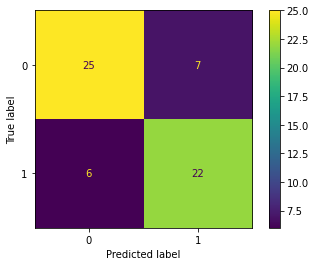

In [24]:
plot_confusion_matrix(grid_result, X_test, y_test);

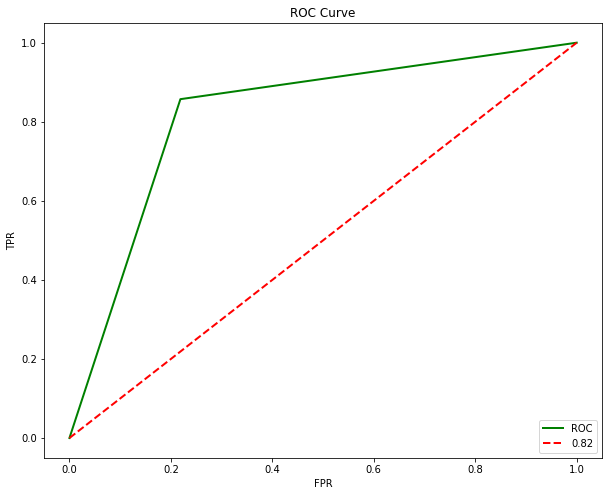

In [25]:
fpr, tpr, thr = roc_curve(y_test, model_dt.predict_proba(X_test)[:,1])

auc = np.round(roc_auc_score(y_test, y_pred),2)

plt.figure(figsize = (10,8))
plt.plot(fpr, tpr, color = 'green', lw = 2, label = 'ROC')
plt.plot((0,1),(0,1), color = 'red', lw = 2, label = str(auc), linestyle = '--') 
plt.legend(loc ='lower right')
plt.title('ROC Curve')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.show()


In [26]:
params = {'criterion': ['gini', 'entropy', 'log_loss'],
          'max_depth': [3, 4, 5, 6, 7, None],
          'max_features':['auto', 'log2']}

m = DecisionTreeClassifier(random_state = 42)

gs = GridSearchCV(estimator = m, param_grid = params, scoring='recall', n_jobs = -1)

gr = gs.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
60 fits failed out of a total of 180.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
60 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/tree/_classes.py", line 942, in fit
    X_idx_sorted=X_idx_sorted,
  File "/usr/local/lib/python3.7/dist-packages/sklearn/tree/_classes.py", line 352, in fit
    criterion = CRITERIA_CLF[self.criterion](
KeyError: 'log_loss'

  warnings.warn(some_fits_failed_mes

In [27]:
gr.best_params_

{'criterion': 'entropy', 'max_depth': None, 'max_features': 'auto'}

In [30]:
cvr = pd.DataFrame(gr.cv_results_).sort_values(by = 'rank_test_score')
cvr.head(5)


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_max_features,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
22,0.010900,0.007505,0.005889,0.003124,entropy,None,auto,"{'criterion': 'entropy', 'max_depth': None, 'm...",0.909091,0.863636,0.863636,0.636364,0.666667,0.787879,0.112978,1
23,0.013920,0.007741,0.008427,0.005372,entropy,None,log2,"{'criterion': 'entropy', 'max_depth': None, 'm...",0.909091,0.863636,0.863636,0.636364,0.666667,0.787879,0.112978,1
10,0.005621,0.000311,0.003785,0.000293,gini,None,auto,"{'criterion': 'gini', 'max_depth': None, 'max_...",0.909091,0.863636,0.772727,0.681818,0.619048,0.769264,0.108334,3
11,0.005986,0.000720,0.003833,0.000409,gini,None,log2,"{'criterion': 'gini', 'max_depth': None, 'max_...",0.909091,0.863636,0.772727,0.681818,0.619048,0.769264,0.108334,3
6,0.007778,0.003213,0.003658,0.000113,gini,6,auto,"{'criterion': 'gini', 'max_depth': 6, 'max_fea...",0.909091,0.863636,0.818182,0.681818,0.523810,0.759307,0.140178,5


# Grid Search with Logistic regression

In [72]:
from sklearn.linear_model import LogisticRegression

import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

m_lr = LogisticRegression()
m_lr = m_lr.fit(X_train, y_train)

y_p = m_lr.predict(X_test)

cr = classification_report(y_test, y_p)
print(cr)

con_mertix = confusion_matrix(y_test, y_p)
print(con_mertix)



              precision    recall  f1-score   support

           0       0.84      0.97      0.90        32
           1       0.96      0.79      0.86        28

    accuracy                           0.88        60
   macro avg       0.90      0.88      0.88        60
weighted avg       0.89      0.88      0.88        60

[[31  1]
 [ 6 22]]


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [73]:
paraMeter ={'penalty' : ['l1', 'l2', 'elasticnet', 'none'],
    'C' : np.logspace(-4, 4, 20),
    'solver' : ['lbfgs','newton-cg','liblinear','sag','saga'],
    'max_iter' : [100, 1000,2500, 5000]
    }

mLR = LogisticRegression()

gridSearch = GridSearchCV(estimator = mLR,param_grid = paraMeter, cv = 3, n_jobs = -1 )

gridResult = gridSearch.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
2160 fits failed out of a total of 4800.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
240 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py", line 1461, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py", line 449, in _check_solver
    % (solver, penalty)
ValueError: S

In [74]:
gridResult.best_estimator_

LogisticRegression(C=0.0001, max_iter=2500, penalty='none')

In [75]:
yp = gridResult.predict(X_test)

cfr = classification_report(y_test, yp)
print(cfr)

              precision    recall  f1-score   support

           0       0.78      0.88      0.82        32
           1       0.83      0.71      0.77        28

    accuracy                           0.80        60
   macro avg       0.81      0.79      0.80        60
weighted avg       0.80      0.80      0.80        60



In [77]:
c = pd.DataFrame(gridResult.cv_results_).sort_values(by = 'rank_test_score')
c.head(5)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_max_iter,param_penalty,param_solver,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
1415,0.665691,0.198618,0.003109,0.000310,1438.449888,2500,none,lbfgs,"{'C': 1438.44988828766, 'max_iter': 2500, 'pen...",0.974684,0.848101,0.772152,0.864979,0.08354,1
935,0.642939,0.154270,0.002991,0.000352,4.281332,2500,none,lbfgs,"{'C': 4.281332398719396, 'max_iter': 2500, 'pe...",0.974684,0.848101,0.772152,0.864979,0.08354,1
135,0.640092,0.164295,0.002883,0.000080,0.000264,2500,none,lbfgs,"{'C': 0.00026366508987303583, 'max_iter': 2500...",0.974684,0.848101,0.772152,0.864979,0.08354,1
615,0.598035,0.135158,0.002772,0.000050,0.088587,2500,none,lbfgs,"{'C': 0.08858667904100823, 'max_iter': 2500, '...",0.974684,0.848101,0.772152,0.864979,0.08354,1
695,0.603282,0.149571,0.002772,0.000012,0.233572,2500,none,lbfgs,"{'C': 0.23357214690901212, 'max_iter': 2500, '...",0.974684,0.848101,0.772152,0.864979,0.08354,1
